In [1]:
import numpy as np
from sympy import init_printing, Matrix
init_printing()
from numpy import cos, sin, pi, round

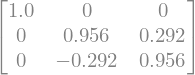

In [86]:
# Rotation om x-aksen
v = np.radians(17)  # Vinkel i grader, omregnes til radianer, da np.cos og np.sin forventer radianer

Matrix(np.array([[1, 0, 0], [0, cos(v), sin(v)], [0, -sin(v), cos(v)]])).evalf(3)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Angle in degrees
theta_deg = 17
theta = np.radians(theta_deg)

# Left-handed rotation around x-axis by +theta
# (Positive angles => clockwise when looking along +x)
R_x_LH = np.array([
    [1,          0,           0],
    [0,  np.cos(theta), np.sin(theta)],
    [0, -np.sin(theta), np.cos(theta)]
])


In [3]:
# Coordinates of a unit cube centered at (0,0,0)
cube_points = np.array([
    [-0.5, -0.5, -0.5],
    [-0.5, -0.5,  0.5],
    [-0.5,  0.5, -0.5],
    [-0.5,  0.5,  0.5],
    [ 0.5, -0.5, -0.5],
    [ 0.5, -0.5,  0.5],
    [ 0.5,  0.5, -0.5],
    [ 0.5,  0.5,  0.5],
])


In [4]:
# Transpose for easier matrix multiplication (3x3 * 3xN)
cube_points_T = cube_points.T
rotated_points_T = R_x_LH @ cube_points_T
rotated_points = rotated_points_T.T


In [6]:
import numpy as np
import plotly.graph_objects as go

# ---------------------------------------------
# 1) Define Cube and Its Edges
# ---------------------------------------------
cube_points = np.array([
    [-0.5, -0.5, -0.5],
    [-0.5, -0.5,  0.5],
    [-0.5,  0.5, -0.5],
    [-0.5,  0.5,  0.5],
    [ 0.5, -0.5, -0.5],
    [ 0.5, -0.5,  0.5],
    [ 0.5,  0.5, -0.5],
    [ 0.5,  0.5,  0.5],
])

# Each pair (i, j) denotes an edge from cube_points[i] to cube_points[j]
edges = [
    (0,1), (0,2), (0,4),   # edges from corner 0
    (1,3), (1,5),          # edges from corner 1
    (2,3), (2,6),          # edges from corner 2
    (3,7),                 # edges from corner 3
    (4,5), (4,6),          # edges from corner 4
    (5,7),                 # edges from corner 5
    (6,7)                  # edges from corner 6
]


def make_wireframe_traces(points, edge_list, color="blue", name="Cube"):
    """
    Returns a list of Plotly Scatter3d traces corresponding to
    the wireframe defined by (points, edges).
    """
    traces = []
    for i, j in edge_list:
        # Two endpoints of the current edge
        x_coords = [points[i,0], points[j,0]]
        y_coords = [points[i,1], points[j,1]]
        z_coords = [points[i,2], points[j,2]]
        
        traces.append(
            go.Scatter3d(
                x=x_coords,
                y=y_coords,
                z=z_coords,
                mode='lines',
                line=dict(color=color, width=4),
                name=name,
                showlegend=False  # We'll set a name just once
            )
        )
    return traces

# ---------------------------------------------
# 2) Define Your Rotation Matrix (Left-Handed, Y-Up)
#    Example: Rotation around X-axis by +17°
# ---------------------------------------------
def rotation_matrix_x_lh(deg):
    theta = np.radians(deg)
    # Left-handed rotation about X by +theta
    # (clockwise if looking in +X direction)
    return np.array([
        [1,            0,             0],
        [0,  np.cos(theta),  np.sin(theta)],
        [0, -np.sin(theta),  np.cos(theta)]
    ])

# ---------------------------------------------
# 3) Apply the Rotation
# ---------------------------------------------
angle = 17
R_x_LH = rotation_matrix_x_lh(angle)

# Rotate all cube_points
cube_points_T = cube_points.T           # shape (3, N)
rotated_points_T = R_x_LH @ cube_points_T
rotated_points = rotated_points_T.T

# ---------------------------------------------
# 4) Create the Plotly Figure
#    - One set of traces for the original (blue)
#    - One set of traces for the rotated (red)
# ---------------------------------------------
original_traces = make_wireframe_traces(cube_points, edges, color="blue", name="Original Cube")
rotated_traces  = make_wireframe_traces(rotated_points, edges, color="red",  name="Rotated Cube")

fig = go.Figure(data=original_traces + rotated_traces)

fig.update_layout(
    scene = dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z",
        aspectmode="cube",   # ensures the axes are the same scale
    ),
    title=f"Wireframe Cube Rotated {angle}° (LH, Y-Up)"
)

fig.show()


#### Forklaring:
Jeg bruger NumPy til at alle beregninger og så placerer jeg det i en SymPy Matrix da det ser pænere ud. Det behøver I ikke at gøre.`evalf()` er en metode i SymPy, der evaluerer et udtryk numerisk så outputtet er et decimaltal. Jeg bruger det til at konvertere outputtet til en float så jeg kan angive det med 3 decimaler. Her er det rene Numpy output.

In [89]:
round(np.array([[1, 0, 0], [0, cos(v), sin(v)], [0, -sin(v), cos(v)]]), 3)

array([[ 1.   ,  0.   ,  0.   ],
       [ 0.   ,  0.956,  0.292],
       [ 0.   , -0.292,  0.956]])

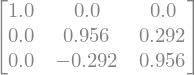

In [90]:
Matrix(round(np.array([[1, 0, 0], [0, cos(v), sin(v)], [0, -sin(v), cos(v)]]), 3))

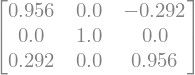

In [106]:
# Rotation om y-aksen
v = np.radians(17)  # Vinkel i grader, omregnes til radianer, da np.cos og np.sin forventer radianer

Matrix(np.round(np.array([[cos(v), 0, -sin(v)], [0, 1, 0], [sin(v), 0, cos(v)]]), 3))

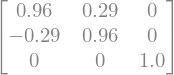

In [24]:
# Rotation om z-aksen
v = np.radians(17)  # Vinkel i grader, omregnes til radianer, da np.cos og np.sin forventer radianer

Matrix(np.array([[cos(v), sin(v), 0], [-sin(v), cos(v), 0], [0, 0, 1]])).evalf(2)

In [ ]:
# Rotation om vilkårlig akse

I bogen (og i Tutorial 4) står følgende:

$R(\hat{n}, \theta)=\left[\begin{array}{ccc}n_x^2(1-\cos \theta)+\cos \theta & n_x n_{v_2}(1-\cos \theta)+n_x \sin \theta & n_x n_x(1-\cos \theta)-n_y \sin \theta \\ n_x n_y(1-\cos \theta)-n_x \sin \theta & n_y(1-\cos \theta)+\cos \theta & n_y n_x(1-\cos \theta)+n_x \sin \theta \\ n_x n_x(1-\cos \theta)+n_y \sin \theta & n_y n_x(1-\cos \theta)-n_x \sin \theta & n_x(1-\cos \theta)+\cos \theta\end{array}\right]$.

Den kan man implementere som følger:

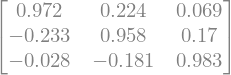

In [104]:
theta_grad = 17  # vinkel i grader


theta = np.radians(theta_grad)  # Vinkel i grader, omregnes til radianer, da np.cos og np.sin forventer radianer
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
one_minus_cos = 1 - cos_theta

np.random.seed(42)
v = np.random.randn(3)
n = v / np.linalg.norm(v)

nx, ny, nz = n  # udtræk indgange i n

# Brug bogens/Tutorial 4's formel for rotation om en arbitrær akse
Matrix(round(np.array([
    [nx**2 * one_minus_cos + cos_theta, nx * ny * one_minus_cos + nz * sin_theta, nx * nz * one_minus_cos - ny * sin_theta],
    [nx * ny * one_minus_cos - nz * sin_theta, ny**2 * one_minus_cos + cos_theta, ny * nz * one_minus_cos + nx * sin_theta],
    [nx * nz * one_minus_cos + ny * sin_theta, ny * nz * one_minus_cos - nx * sin_theta, nz**2 * one_minus_cos + cos_theta]
]), 3))


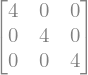

In [ ]:
# Skalering: Samme i alle retninger

k = 4 # samme skaleringsfaktor i alle retninger

Matrix(np.array([[k, 0, 0], [0, k, 0], [0, 0, k]]))

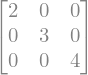

In [27]:
# Skalering: Forskellige skaleringer i forskellige retninger

a = 2 # Skalering i x-retning
b = 3 # Skalering i y-retning
c = 4 # Skalering i z-retning

Matrix(np.array([[a, 0, 0], [0, b, 0], [0, 0, c]]))

In [ ]:
# Konstruer en matrix, der skalerers med en faktor 3 omkring planet gennem origo, som er vinkelret på v

I bogen (og i Tutorial 4) står følgende:

$$
S(\hat{n}, k)=\left[\begin{array}{ccc}
1+(k-1) n_x^2 & (k-1) n_x n_y & (k-1) n_x n_z \\
(k-1) n_x n_y & 1+(k-1) n_y^2 & (k-1) n_y n_z \\
(k-1) n_x n_z & (k-1) n_y n_z & 1+(k-1) n_z^2
\end{array}\right]
$$

All 1-tallerne kan placeres i en 3x3 identitetsmatrix og vi kan sætte $k-1$ uden for, så vi kan skrive det som:

$$
S(\hat{n}, k)=
\left[\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right] +(k-1) \left[\begin{array}{ccc}
n_x^2 & n_x n_y & n_x n_z \\
n_x n_y & n_y^2 & n_y n_z \\
n_x n_z & n_y n_z & n_z^2
\end{array}\right]$$

Hvis vi undersøger den sidste matrix, følger den et helt bestemt mønster, nemlig at den er en ydreprodukt af $\hat{n}$ med sig selv. Dette kan vi skrive som:

$$S(\hat{n}, k)=I+(k-1) \hat{n} \hat{n}^T$$

Det betyder vi kan beregne disse problemer ret hurtigt.

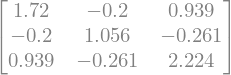

In [92]:
np.random.seed(42)
v = np.random.randn(3)
n = v / np.linalg.norm(v)
k = 3

v, n

Matrix(round(np.eye(3) + (k-1) * np.outer(n, n), 3))

Husk at ortografisk projektion blot er ovenstående med $k=0$ og at ortografisk spejling er ovenstående med $k=-1$.